In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
titanic_data=pd.read_csv('/content/drive/MyDrive/ML Datasets/train.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(titanic_data.shape)

(891, 12)


In [ ]:
#handling missing values
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


 for handling missing values
1. Imputation
2. Dropping

In [ ]:
# Dropping
#titanic_data=titanic_data.dropna(how='any')
## how='any' drops all the missing values from the dataset


In [ ]:
# checking
#titanic_data.isnull().sum()

Dropping Cabin column as it has many missing values

In [ ]:
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [ ]:
print(titanic_data.shape)

(891, 11)


But, dropping is not an efficient approach for the small datasets , it is fine for only large datasets

/tmp/ipython-input-1306109718.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

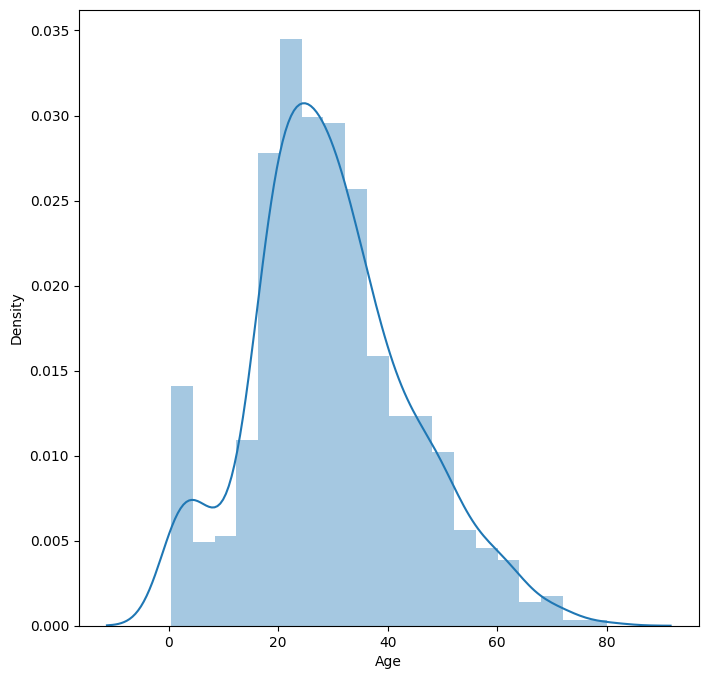

In [ ]:
# Imputation
#first we will plot and check which central tendency to use to replace age missing values
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(titanic_data['Age'])

The plot is right skewed so we use median

In [ ]:
#Replacing missing values with median
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)

/tmp/ipython-input-306216880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)


In [ ]:
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


Now we replace missing values of embarked

In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-2211149711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)


In [ ]:
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Checking data[Imbalanced]

In [ ]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


Data is balanced

Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

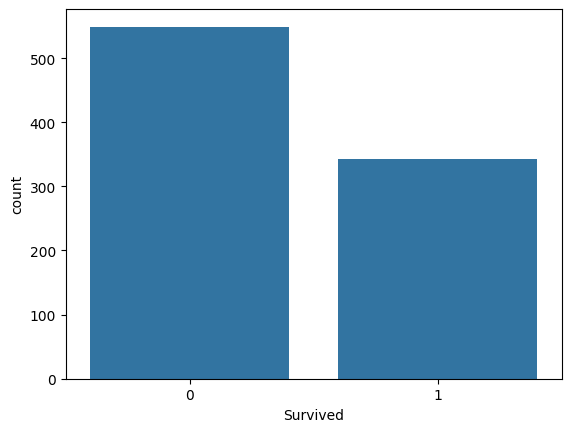

In [ ]:
#making a count plot for "survived" column
sns.countplot(x="Survived", data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

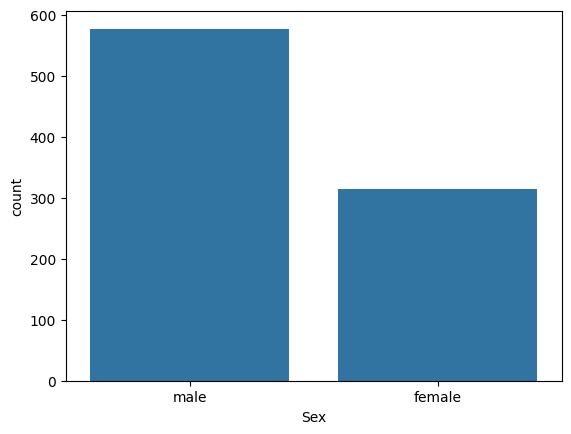

In [ ]:
#making a count plot for "sex" column
sns.countplot(x="Sex", data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

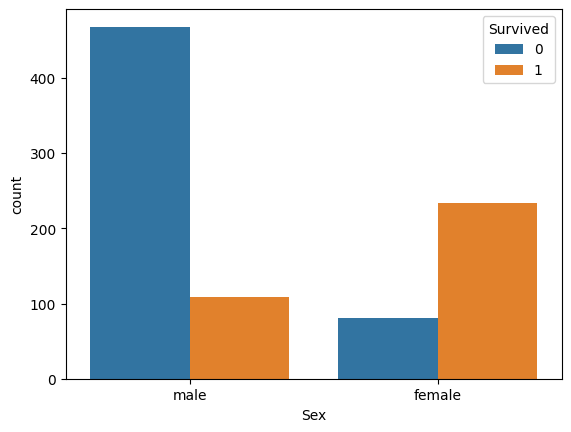

In [ ]:
# number of survivors gender based
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

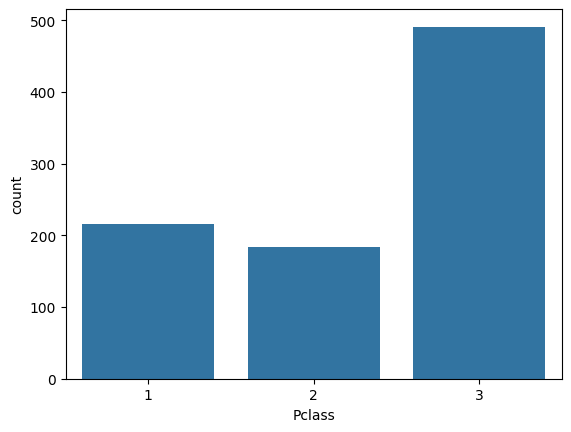

In [ ]:
#making a count plot for "pclass" column
sns.countplot(x="Pclass", data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

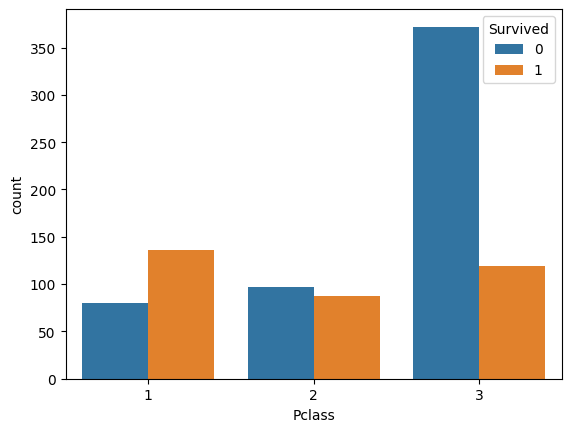

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

Encoding the Categorical Columns

In [ ]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


Label Encoding Sex

In [ ]:
label_encode=LabelEncoder()

In [ ]:
labels=label_encode.fit_transform(titanic_data['Sex'])

In [ ]:
#creating a column gender and appending to the dataset
titanic_data['Gender']=labels

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


0--Female
1--Male

In [ ]:
titanic_data=titanic_data.drop(columns='Sex',axis=1)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


In [ ]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.00,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.00,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.45,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.00,C,1
890,891,0,3,"Dooley, Mr. Patrick",32.0,0,0,370376,7.75,Q,1


Embarked is also categorical data but it has 3 (S,C,Q) which can't be done by leabel encoding simply, we need to do one-hot encoding

In [ ]:
titanic_data = pd.get_dummies(titanic_data,columns=['Embarked'])#drop_first=True


In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,False,False,True


Before standardization, your feature matrix must contain ONLY numeric columns.

In [ ]:
titanic_data.drop(['Name', 'Ticket','PassengerId'],axis=1,inplace=True)

In [ ]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,False,False,True
1,1,1,38.0,1,0,71.2833,0,True,False,False
2,1,3,26.0,0,0,7.9250,0,False,False,True
3,1,1,35.0,1,0,53.1000,0,False,False,True
4,0,3,35.0,0,0,8.0500,1,False,False,True


Standardizing the data[ Setting into a range]
Before Standardizing, we split the data

In [ ]:
X=titanic_data.drop(columns='Survived')
Y=titanic_data['Survived']

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,False,False,True
1,1,38.0,1,0,71.2833,0,True,False,False
2,3,26.0,0,0,7.9250,0,False,False,True
3,1,35.0,1,0,53.1000,0,False,False,True
4,3,35.0,0,0,8.0500,1,False,False,True


In [ ]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
X.shape

(891, 9)

In [ ]:
X_train.shape

(712, 9)

In [ ]:
X_test.shape

(179, 9)

In [ ]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,False,False,True
1,1,1,38.0,1,0,71.2833,0,True,False,False
2,1,3,26.0,0,0,7.9250,0,False,False,True
3,1,1,35.0,1,0,53.1000,0,False,False,True
4,0,3,35.0,0,0,8.0500,1,False,False,True


In [ ]:
#Standardizing
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
X_train_scaled

array([[-1.55247675,  0.83137796, -0.4668076 , ...,  1.98606255,
        -0.32494624, -1.53573779],
       [ 0.8349173 , -1.99608479,  0.42187424, ..., -0.50350881,
        -0.32494624,  0.65115282],
       [ 0.8349173 ,  1.38116239, -0.4668076 , ..., -0.50350881,
        -0.32494624,  0.65115282],
       ...,
       [-1.55247675,  3.26613756, -0.4668076 , ...,  1.98606255,
        -0.32494624, -1.53573779],
       [-1.55247675, -0.11110962, -0.4668076 , ..., -0.50350881,
        -0.32494624,  0.65115282],
       [-1.55247675, -0.11110962, -0.4668076 , ..., -0.50350881,
        -0.32494624,  0.65115282]])

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_test_scaled

array([[-1.55247675,  0.98845923, -0.4668076 , ..., -0.50350881,
        -0.32494624,  0.65115282],
       [ 0.8349173 , -0.66089405, -0.4668076 , ..., -0.50350881,
        -0.32494624,  0.65115282],
       [-0.35877972, -0.42527215,  0.42187424, ..., -0.50350881,
        -0.32494624,  0.65115282],
       ...,
       [ 0.8349173 , -0.11110962,  6.64264713, ..., -0.50350881,
        -0.32494624,  0.65115282],
       [ 0.8349173 , -0.26819089, -0.4668076 , ..., -0.50350881,
        -0.32494624,  0.65115282],
       [ 0.8349173 , -0.03256899,  0.42187424, ..., -0.50350881,
        -0.32494624,  0.65115282]])

Checking Final DataSet

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Gender      891 non-null    int64  
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


In [ ]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Gender,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [ ]:
titanic_data.select_dtypes(include='object').columns

Index([], dtype='object')

Index([], dtype='object') indicates that the dataset contains no object-type columns and is fully numeric.
if it is : Index(['Name', 'Ticket'], dtype='object') text exists


Model Training
Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
#training logistic regression model with training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation
Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction=model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [ ]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy Score of training data : ',training_data_accuracy)

Accuracy Score of training data :  0.8089887640449438


In [ ]:
# accuracy on test data
X_test_prediction=model.predict(X_test)

In [ ]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy Score of testing data : ',testing_data_accuracy)

Accuracy Score of testing data :  0.7877094972067039


Confusion Matrix

In [ ]:
cf_matrix=confusion_matrix(Y_test,X_test_prediction)
print(cf_matrix)

[[91  9]
 [29 50]]


<Axes: >

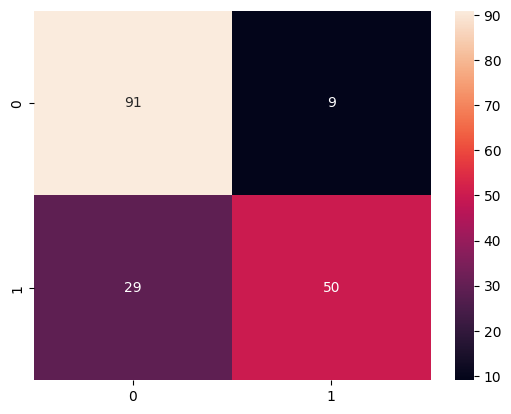

In [ ]:
sns.heatmap(cf_matrix,annot=True)

Precision

In [ ]:
precision_train=precision_score(Y_train,X_train_prediction)
print('Training data precision', precision_train)

Training data precision 0.7613168724279835


In [ ]:
precision_test=precision_score(Y_test,X_test_prediction)
print('Testing data precision', precision_test)

Testing data precision 0.847457627118644


Recall

In [ ]:
recall_train=recall_score(Y_train,X_train_prediction)
print('Training data Recall', recall_train)

Training data Recall 0.7034220532319392


In [ ]:
recall_test=recall_score(Y_test,X_test_prediction)
print('Testing data recall', recall_test)

Testing data recall 0.6329113924050633


F1 Score

In [ ]:
f1_train=f1_score(Y_train,X_train_prediction)
print('Training data f1', f1_train)

Training data f1 0.7312252964426877


In [ ]:
f1_test=f1_score(Y_test,X_test_prediction)
print('Testing data f1', f1_test)

Testing data f1 0.7246376811594203
